## Inferential Statistical Analysis

Video games have been an increasing part of our lives for nearly 40 years and only becoming more prolific. There are three major companies when it comes to home systems: Nintendo, Sony, and Microsoft. Nintendo and Sony have been around for years with their respective platforms (SNES, NES, GC, Wii, WiiU, Switch, PS1-PS4) while Microsoft is a bit younger, having only Xbox, Xbox360, and XOne systems. 

I wanted to see if there was a significant difference in sales between games on a Nintendo platform vs Sony platform. Some basic prep work on the variables is below, followed by more detail on the test.

In [80]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from collections import Counter
from scipy import stats
#from plotnine import *
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest




pd.set_option('display.expand_frame_repr', False) #expands columns in pandas removing truncation

df = pd.read_csv(r'C:\Users\jason\Desktop\vgsales.csv')
col_names = df.columns

# Remove unwanted columns
df = df[['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Release_Date']]

# import ign df with scores
ign = pd.read_csv(r'C:\Users\jason\Desktop\ign.csv')
ign = ign[['title', 'platform', 'score', 'editors_choice', 'release_year', 'release_month', 'release_day']]

# Rename date columns to capital for consistency
ign.rename(columns={'release_year': 'Release_Year', 'release_month': 'Release_Month', 'release_day': 'Release_Day'},
           inplace=True)


# Fix platform data in ign so it matches that in games df
consoles_ign = ['NES', 'Super NES', 'Nintendo 64', 'GameCube', 'Wii', 'Wii U', 'NS', 'Game Boy', 'Game Boy Color',
                'Game Boy Advance', 'Game Gear', 'Nintendo DS', 'Nintendo 3DS', 'PlayStation', 'PlayStation 2', 'PlayStation 3',
                'PlayStation 4', 'PlayStation Portable', 'PlayStation Vita', 'Xbox', 'Xbox 360', 'Xbox One', 'Genesis', 'Dreamcast']

consoles_games = ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU', 'NS', 'GB', 'GBC', 'GBA', 'GG', 'DS', '3DS', 'PS', 'PS2',
            'PS3', 'PS4', 'PSP', 'PSV', 'XB', 'X360', 'XOne', 'GEN', 'DC']



ign = ign.replace(to_replace=consoles_ign, value=consoles_games)


# ~~~~~~~~~PLATFORM~~~~~~~~~~

# Looking at the different types of Platforms to remove unnecessary ones (nobody cares about the commodore 64 from '85)
df.Platform.value_counts(dropna=False)


consoles = ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU', 'NS', 'GB', 'GBA', 'GBC', 'GG', 'DS', '3DS', 'PS', 'PS2',
            'PS3', 'PS4', 'PSP', 'PSV', 'XB', 'X360', 'XOne', 'GEN', 'DC']


# Removes all rows NOT associated with the above consoles and makes new db, games, by merging
vgsales = df[df['Platform'].isin(consoles)]
ign = ign[ign['platform'].isin(consoles)]


# join the two dfs based on game name (and add platform)
games = pd.merge(vgsales, ign, left_on=['Name', 'Platform'], right_on=['title', 'platform'], how='left')




# Fixing Sales columns (removing m)
games.Global_Sales = games.Global_Sales.str.replace('m', '')
games.NA_Sales = games.NA_Sales.str.replace('m', '')
games.PAL_Sales = games.PAL_Sales.str.replace('m', '')
games.JP_Sales = games.JP_Sales.str.replace('m', '')
games.Other_Sales = games.Other_Sales.str.replace('m', '')

# Splitting Release_Date into Day/Month/Year
games['Day'] = games.Release_Date.str[0:2]
games['Month'] = games.Release_Date.str[5:8]
games['Year'] = games.Release_Date.str[9:]

# Converting to appropriate data types
games.Genre = games.Genre.astype('category')
games.Name = games.Name.astype('str')
games.Platform = games.Platform.astype('category')
games.Publisher = games.Publisher.astype('category')
games.Developer = games.Developer.astype('category')
games.Global_Sales = games.Global_Sales.astype('float')
games.NA_Sales = games.NA_Sales.astype('float')
games.PAL_Sales = games.PAL_Sales.astype('float')
games.JP_Sales = games.JP_Sales.astype('float')
games.Other_Sales = games.Other_Sales.astype('float')
games.title = games.title.astype('str')
games.platform = games.platform.astype('category')
games.editors_choice = games.editors_choice.astype('category')



# Converting to Datetime
games.Release_Date = games.Month + '/' + games.Day + '/' + games.Year.astype('str') #combine to single column
games.Release_Date = [None if pd.isnull(dates) else datetime.strptime(str(dates), '%b/%d/%y') for dates in games.Release_Date]

# Remove titles with 1970 release dates (wrong)
games = games[games['Release_Date'].dt.year >= 1980]

# Fixing titles discovered incorrect dates
# check on "A value is trying to be set on a copy of a slice"
games.loc[[21278], 'Release_Date'] = games.loc[21278, 'Release_Date'].replace(2003)
games.loc[[2232], 'Release_Date'] = games.loc[2232, 'Release_Date'].replace(2010)
games.loc[[11572], 'Release_Date'] = games.loc[11572, 'Release_Date'].replace(2007)
games.loc[[17935], 'Release_Date'] = games.loc[17935, 'Release_Date'].replace(2008)
games.loc[[25883], 'Release_Date'] = games.loc[25883, 'Release_Date'].replace(2009)
games.loc[[15941], 'Release_Date'] = games.loc[15941, 'Release_Date'].replace(2006)
games.loc[[22295], 'Release_Date'] = games.loc[22295, 'Release_Date'].replace(2007)
games.loc[[1005], 'Release_Date'] = games.loc[1005, 'Release_Date'].replace(2012)
games.loc[[1751], 'Release_Date'] = games.loc[1751, 'Release_Date'].replace(2009)
games.loc[[10413], 'Release_Date'] = games.loc[10413, 'Release_Date'].replace(2013)
games.loc[[19837], 'Release_Date'] = games.loc[19837, 'Release_Date'].replace(2006)
games.loc[[21229], 'Release_Date'] = games.loc[21229, 'Release_Date'].replace(2011)
games.loc[[21763], 'Release_Date'] = games.loc[21763, 'Release_Date'].replace(2011)
games.loc[[2012], 'Release_Date'] = games.loc[2012, 'Release_Date'].replace(2011)
games.loc[[11368], 'Release_Date'] = games.loc[11368, 'Release_Date'].replace(2014)
games.loc[[5363], 'Release_Date'] = games.loc[5363, 'Release_Date'].replace(2000)
games.loc[[6033], 'Release_Date'] = games.loc[6033, 'Release_Date'].replace(2001)
games.loc[[6033], 'Release_Date'] = games.loc[6033, 'Release_Date'].replace(2001)



# Find other titles with improper release and no info, as discovered (never released, cancelled, etc)
consoles = ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU', 'NS', 'GB', 'GBA', 'GBC', 'GG', 'DS', '3DS', 'PS', 'PS2',
            'PS3', 'PS4', 'PSP', 'PSV', 'XB', 'X360', 'XOne', 'GEN', 'DC']
begin = [1983, 1990, 1996, 2001, 2006, 2012, 2017, 1989, 2001, 1998, 1990, 2004, 2011, 1994, 2000,
            2006, 2013, 2005, 2011, 2001, 2005, 2013, 1988, 1998]
end = [1995, 1999, 2002, 2007, 2017, 2018, 2020, 2003, 2008, 2003, 1997, 2016, 2020, 2006, 2013,
            2017, 2020, 2016, 2020, 2009, 2017, 2020, 1999, 2001]
life = [j - i for i, j in zip(begin, end)]


systems_info = pd.DataFrame({'Consoles': consoles,
                             'Start': begin,
                             'Discontinued': end,
                             'Lifespan': life})

systems_info = systems_info.sort_values('Start')
systems_info = systems_info.reset_index(inplace=False)
systems_info = systems_info.drop('index', axis=1)



# Create General categories Nintendo, Sony, Microsoft etc
company = [] # initialize a list

# List of platforms to define each company
Nintendo = ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU', 'NS', 'GB', 'GBA', 'GBC', 'DS', '3DS']
Microsoft = ['XB', 'X360', 'XOne']
Sony = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
Sega = ['GEN', 'DC', 'GG']


# Loop over platforms to fill company list up and add it to games df
for i in games.Platform:
    if i in Sony:
        company.append('Sony')
    elif i in Nintendo:
        company.append('Nintendo')
    elif i in Microsoft:
        company.append('Microsoft')
    else:
        company.append('Sega')

games['Company'] = company




# Create df's for each system with erroneous dates to fix as needed
bad_NES = games.loc[((games['Release_Date'].dt.year < begin[0]) | (games['Release_Date'].dt.year > end[0]))
                      & (games['Platform'] == consoles[0])]
bad_SNES = games.loc[((games['Release_Date'].dt.year < begin[1]) | (games['Release_Date'].dt.year > end[1]))
                      & (games['Platform'] == consoles[1])]
bad_N64 = games.loc[((games['Release_Date'].dt.year < begin[2]) | (games['Release_Date'].dt.year > end[2]))
                      & (games['Platform'] == consoles[2])]
bad_GC = games.loc[((games['Release_Date'].dt.year < begin[3]) | (games['Release_Date'].dt.year > end[3]))
                      & (games['Platform'] == consoles[3])]
bad_Wii = games.loc[((games['Release_Date'].dt.year < begin[4]) | (games['Release_Date'].dt.year > end[4]))
                      & (games['Platform'] == consoles[4])]
bad_WiiU = games.loc[((games['Release_Date'].dt.year < begin[5]) | (games['Release_Date'].dt.year > end[5]))
                      & (games['Platform'] == consoles[5])]
bad_NS = games.loc[((games['Release_Date'].dt.year < begin[6]) | (games['Release_Date'].dt.year > end[6]))
                      & (games['Platform'] == consoles[6])]
bad_GB = games.loc[((games['Release_Date'].dt.year < begin[7]) | (games['Release_Date'].dt.year > end[7]))
                      & (games['Platform'] == consoles[7])]
bad_GBA = games.loc[((games['Release_Date'].dt.year < begin[8]) | (games['Release_Date'].dt.year > end[8]))
                      & (games['Platform'] == consoles[8])]
bad_GBC = games.loc[((games['Release_Date'].dt.year < begin[9]) | (games['Release_Date'].dt.year > end[9]))
                      & (games['Platform'] == consoles[9])]
bad_GG = games.loc[((games['Release_Date'].dt.year < begin[10]) | (games['Release_Date'].dt.year > end[10]))
                      & (games['Platform'] == consoles[10])]
bad_DS = games.loc[((games['Release_Date'].dt.year < begin[11]) | (games['Release_Date'].dt.year > end[11]))
                      & (games['Platform'] == consoles[11])]
bad_3DS = games.loc[((games['Release_Date'].dt.year < begin[12]) | (games['Release_Date'].dt.year > end[12]))
                      & (games['Platform'] == consoles[12])]
bad_PS = games.loc[((games['Release_Date'].dt.year < begin[13]) | (games['Release_Date'].dt.year > end[13]))
                      & (games['Platform'] == consoles[13])]
bad_PS2 = games.loc[((games['Release_Date'].dt.year < begin[14]) | (games['Release_Date'].dt.year > end[14]))
                      & (games['Platform'] == consoles[14])]
bad_PS3 = games.loc[((games['Release_Date'].dt.year < begin[15]) | (games['Release_Date'].dt.year > end[15]))
                      & (games['Platform'] == consoles[15])]
bad_PS4 = games.loc[((games['Release_Date'].dt.year < begin[16]) | (games['Release_Date'].dt.year > end[16]))
                      & (games['Platform'] == consoles[16])]
bad_PSP = games.loc[((games['Release_Date'].dt.year < begin[7]) | (games['Release_Date'].dt.year > end[17]))
                      & (games['Platform'] == consoles[17])]
bad_PSV = games.loc[((games['Release_Date'].dt.year < begin[18]) | (games['Release_Date'].dt.year > end[18]))
                      & (games['Platform'] == consoles[18])]
bad_XB = games.loc[((games['Release_Date'].dt.year < begin[19]) | (games['Release_Date'].dt.year > end[19]))
                      & (games['Platform'] == consoles[19])]
bad_X360 = games.loc[((games['Release_Date'].dt.year < begin[20]) | (games['Release_Date'].dt.year > end[20]))
                      & (games['Platform'] == consoles[20])]
bad_XOne = games.loc[((games['Release_Date'].dt.year < begin[21]) | (games['Release_Date'].dt.year > end[21]))
                      & (games['Platform'] == consoles[21])]
bad_GEN = games.loc[((games['Release_Date'].dt.year < begin[22]) | (games['Release_Date'].dt.year > end[22]))
                      & (games['Platform'] == consoles[22])]
bad_DC = games.loc[((games['Release_Date'].dt.year < begin[23]) | (games['Release_Date'].dt.year > end[23]))
                      & (games['Platform'] == consoles[23])]
bad_DC.drop(24721, inplace=True) # drop value that actually was released outside of release date so not removed below

# Fix the two missing values for developers
games[games['Developer'].isnull()]
games.loc[[10489], 'Developer'] = 'Ubisoft'
games.loc[[31225], 'Developer'] = 'Unknown'

# Drop games with no info and bad dates (assume never released) 246 games
games = games.drop(bad_NES.index.values)
games = games.drop(bad_SNES.index.values)
games = games.drop(bad_GC.index.values)
games = games.drop(bad_Wii.index.values)
games = games.drop(bad_WiiU.index.values)
games = games.drop(bad_GB.index.values)
games = games.drop(bad_GBA.index.values)
games = games.drop(bad_DS.index.values)
games = games.drop(bad_3DS.index.values)
games = games.drop(bad_PS.index.values)
games = games.drop(bad_PS2.index.values)
games = games.drop(bad_PS3.index.values)
games = games.drop(bad_PSP.index.values)
games = games.drop(bad_X360.index.values)
games = games.drop(bad_GEN.index.values)
games = games.drop(bad_DC.index.values)

# Drop all games missing global sales values pre 2018 (not games to predict)
todrop = games[games['Global_Sales'].isnull() & (games['Release_Date'].dt.year < 2018)]
games = games.drop(todrop.index)


# Clean up missing dates
games.Release_Year = games.Release_Date.dt.year
games.Release_Month = games.Release_Date.dt.month
games.Release_Day = games.Release_Date.dt.day


# Check on number of missing values
games.isnull().sum()



games = games.sort_values(['Release_Date']) #.reset_index(drop=True)
games['Order'] = list(range(len(games)))
games = games.sort_index()




a = games

C:\Users\jason\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [81]:
# Quick simple hypothesis test:
nintendo = games[games['Company'] == 'Nintendo']
nintendo = nintendo.dropna(subset=['Global_Sales'])
ninsales = nintendo.Global_Sales
sony = games[games['Company'] == 'Sony']
sony = sony.dropna(subset=['Global_Sales'])
sonysales = sony.Global_Sales


print('Nintendo mean:', np.mean(ninsales))
print('Sony mean:', np.mean(sonysales))

Nintendo mean: 0.5158748083089421
Sony mean: 0.500222909418894


In [142]:
len(ninsales)

7173

In [143]:
len(sonysales)

7761

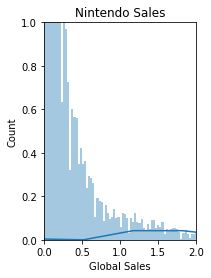

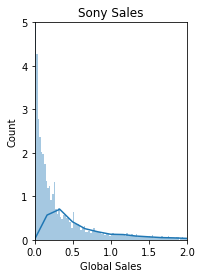

t = 0.6
p-value = 0.548
p-value much greater than alpha, so we cannot reject the null hypothesis and Nintendo did not make significantly more sales


In [148]:
# It appears like Nintendo sells better, is that true?
# Histogram
plt.figure()
plt.subplot(121)
sns.distplot(ninsales, bins=3000)
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.xlabel('Global Sales')
plt.ylabel('Count')
plt.title('Nintendo Sales')
plt.show()

plt.subplot(122)
sns.distplot(sonysales, bins=1000)
plt.ylim(0, 5)
plt.xlim(0, 2)
plt.xlabel('Global Sales')
plt.ylabel('Count')
plt.title('Sony Sales')
plt.show()



# H0: Nintendo based mean game sales is the same as Sony based mean game sales (μn = μs)
# Ha: Nintendo based mean game sales is  not the same as Sony based mean game sale (μn != μs)
# alpha = 0.05

from statsmodels.stats.weightstats import ztest

hyp = ztest(nintendo.Global_Sales, sony.Global_Sales)
print('t =', round(hyp[0], 3))
print('p-value =', round(hyp[1], 3))
print('p-value much greater than alpha, so we cannot reject the null hypothesis and Nintendo did not make significantly more sales')


Text(0.5,1,'Nintendo and Sony Sales Histogram')

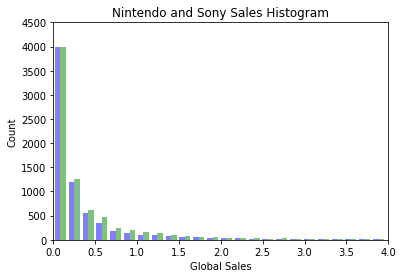

In [149]:
plt.hist([ninsales, sonysales], color=['b', 'g'], alpha=0.5, bins=500)
plt.xlim(0, 4)
plt.ylim(0, 4500)
plt.xlabel('Global Sales')
plt.ylabel('Count') 
plt.title('Nintendo and Sony Sales Histogram')
#plt.legend([ninsales, sonysales], ["Nintendo", "Sony"])

Text(0.5,1,'Global Sales of Nintendo and Sony Platform Games')

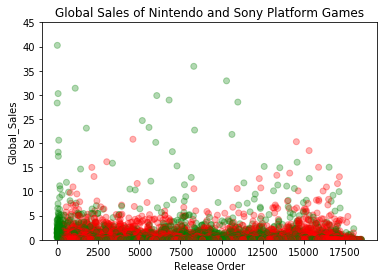

In [133]:
a = games[['Global_Sales', 'Company', 'Order']]
a = a[(a['Company'] == 'Nintendo') | (a['Company'] == 'Sony')]
Global_Sales = a.Global_Sales
Company = a.Company
Order = a.Order

df = pd.DataFrame(dict(Global_Sales=Global_Sales, Company=Company, Order=Order))

fig, ax = plt.subplots()
colors = {'Nintendo':'green', 'Sony':'red'}
ax.scatter(df['Order'], df['Global_Sales'], c=df['Company'].apply(lambda x: colors[x]), alpha=0.3)
plt.ylim(0,45)
plt.xlabel('Release Order')
plt.ylabel('Global_Sales')
plt.title('Global Sales of Nintendo and Sony Platform Games')